In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import matplotlib.pyplot as plt
import pickle

import sys
sys.path.append("../../")

from src.context_aware.config import DatasetConfig
from src.DatasetManager import DatasetConvertor 
from src.context_aware.preprocessing import PreparingDataset

========== Thumb ============
Forward: Compression rate: 0.2231
========== Index ============
Forward: Compression rate: 0.2456
========== Middle ============
Forward: Compression rate: 0.2491
Ts:0.01


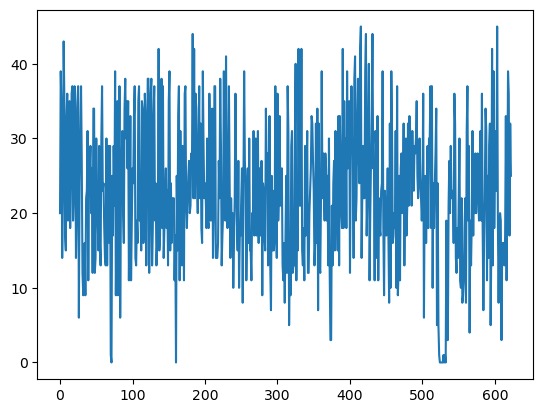

========== Thumb ============
Backward: Compression rate: 0.3588
========== Index ============
Backward: Compression rate: 0.3281
========== Middle ============


KeyboardInterrupt: 

In [5]:
rawDatasetFolder = "../../data/raw"
lenWindow = 100

mapping = {"forward": "fr", "backward": "bk"}
dpdr_params = [
    {"dbParameter": 0.01, "alpha": 0.01, "mode": "fixed"}, 
    {"dbParameter": 0.1, "alpha": 0.01, "mode": "fixed"}
]
for i, direction in enumerate(["forward", "backward"]):
    datasetConverter = DatasetConvertor(rawDatasetFolder)
    datasetConverter.processDataset(direction=direction, **dpdr_params[i])
    thumbDataUnit = datasetConverter.getDataUnit(f"thumb_{mapping[direction]}")

    datasetConfig = DatasetConfig.initialize(len_window=lenWindow, data_augment=False)
    trainData, testData = PreparingDataset(thumbDataUnit, datasetConfig, verbose=False)
    (_,_,_,traffic_pattern,_,_,_,_) = trainData
    print(f"Ts:{thumbDataUnit.Ts}")
    plt.plot(traffic_pattern.flatten())
    plt.show()